In [1]:
import warnings
#warnings.simplefilter("ignore",category=ImportWarning)
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
from astropy import units
from astropy.io import ascii
from scipy.optimize import curve_fit
from matplotlib.backends.backend_pdf import PdfPages 
np.seterr(all="ignore")
import math
np.random.seed(12345)

from threeML import *
from threeML.io.package_data import get_path_of_data_file
from threeML.io.logging import silence_console_log
from astropy.io import fits
import astromodels.functions.numba_functions as nb_func
 
import astropy.units as astropy_units
from astromodels.functions.function import (
    Function1D,
    
    FunctionMeta,
    ModelAssertionViolation,
)
from past.utils import old_div
import astromodels.functions.functions_1D.powerlaws as pw

Welcome to JupyROOT 6.22/08


17:23:23 WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=986063;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=165380;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/astromodels/functions/functions_1D/functions.py#72\72]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=822600;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=829485;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/astromodels/functions/functions_1D/absorption.py#37\37]8;;\
                  available                                                                                        

17:23:23 INFO      Starting 3ML!                                                                     ]8;id=657026;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=533284;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/__init__.py#31\31]8;;\

         WARNING   Multinest minimizer not available                                           ]8;id=603227;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=899136;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

         WARNING   PyGMO is not available                                                      ]8;id=116812;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=959093;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

         WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=461287;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=630791;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/__init__.py#80\80]8;;\
                  require the C/C++ interface (currently HAWC)                                                     


WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject



         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=608107;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=800248;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/__init__.py#130\130]8;;\
                  software installed and configured?                                                               

         WARNING   Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=441241;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=328074;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/__init__.py#343\343]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=362813;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=938374;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/__init__.py#343\343]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal     ]8;id=436188;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=229629;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/__init__.py#343\343]8;;\
                  performances in 3ML                                                                              

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
from matplotlib.backends.backend_pdf import PdfPages 
np.seterr(all="ignore")
from astropy.io import fits
np.random.seed(12345)
import matplotlib

In [2]:
import bandn
class Bandnew(Function1D, metaclass=FunctionMeta):
    r"""
    description :

        Band model from Band et al., 1993, parametrized with the peak energy

    latex : $K \begin{cases} \left(\frac{x}{piv}\right)^{\alpha} \exp \left(-\frac{(2+\alpha) x}{x_{p}}\right) & x \leq (\alpha-\beta) \frac{x_{p}}{(\alpha+2)} \\ \left(\frac{x}{piv}\right)^{\beta} \exp (\beta-\alpha)\left[\frac{(\alpha-\beta) x_{p}}{piv(2+\alpha)}\right]^{\alpha-\beta} &x>(\alpha-\beta) \frac{x_{p}}{(\alpha+2)} \end{cases} $

    parameters :

        K :

            desc : Differential flux at the pivot energy
            initial value : 1e-4
            min : 1e-50
            is_normalization : True
            transformation : log10

        alpha :

            desc : low-energy photon index
            initial value : -1.0
            min : -1.5
            max : 3

        xp :

            desc : peak in the x * x * N (nuFnu if x is a energy)
            initial value : 500
            min : 10
            transformation : log10

        beta :

            desc : high-energy photon index
            initial value : -2.1
            min : -10.0
            max : -2.1

    """
    
    def _set_units(self, x_unit, y_unit):
        self.K.unit = y_unit
        self.xp.unit = x_unit
        self.alpha.unit = astropy_units.dimensionless_unscaled
        self.beta.unit = astropy_units.dimensionless_unscaled

    def evaluate(self, x, K, alpha, xp, beta):
        E0 = xp / (2 + alpha)
        x_ = x
        if alpha < beta:
            alpha = beta
            log.warning("Alpha is currently less than beta. Setting alpha = beta.")

        if isinstance(x, astropy_units.Quantity):
            x_ = x.value
            alpha_ = alpha.value
            beta_ = beta.value
            K_ = K.value
            E0_ = E0.value
            unit_ = self.y_unit
        else:
            unit_ = 1.0
            alpha_, beta_, K_, x_, E0_ = alpha, beta, K, x, E0
       
        photar = np.empty_like(x_)
        for i in range(len(x_)):
            photar[i]=bandn.band(x_[i], alpha_, beta_, E0_, K_)

        return photar*unit_


In [3]:
import matplotlib
font = {'family' : 'serif','weight' : 'bold','size' : 10}
matplotlib.rc('font',**font)
matplotlib.rc('grid',linewidth=1)
matplotlib.rc('xtick.major',width=2)
matplotlib.rc('xtick.major',size=5)
matplotlib.rc('xtick.minor',width=2)
matplotlib.rc('xtick.minor',size=3)
matplotlib.rc('ytick.major',width=2)
matplotlib.rc('ytick.major',size=5)
matplotlib.rc('ytick.minor',width=2)
matplotlib.rc('ytick.minor',size=3)

threeML_config.plugins.ogip.fit_plot.model_cmap = "Set1"
threeML_config.plugins.ogip.fit_plot.n_colors = 5

In [9]:
triggerName = 'bn220426285'
ra = 60.8542
dec =  -75.3783
time_stamps = 10

In [5]:
bnd = Bandnew()
model = 'Band_new'
spec = bnd

bnd.alpha.prior = Uniform_prior(lower_bound=-1.5, upper_bound=1.0)
bnd.beta.prior = Uniform_prior(lower_bound=-10, upper_bound=-2.1)
bnd.xp.prior = Uniform_prior(lower_bound=100, upper_bound=2000)
bnd.K.prior = Log_uniform_prior(lower_bound=1e-5, upper_bound=1e5)

spec_model = Model(PointSource(triggerName, ra, dec, spectral_shape=spec))

17:23:24 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=841701;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=128923;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=430133;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=110229;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.089000225067139)                                                                              

         INFO      Auto-probed noise models:                                                    ]8;id=857379;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=480766;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - observation: poisson                                                       ]8;id=606471;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=112880;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      - background: gaussian                                                       ]8;id=972741;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=379959;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#493\493]8;;\

17:23:25 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=81910;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=203698;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=736543;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=664985;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.666999816894531)                                                                              

         INFO      Auto-probed noise models:                                                    ]8;id=572340;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=866612;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - observation: poisson                                                       ]8;id=465104;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=793599;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      - background: gaussian                                                       ]8;id=760573;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=584837;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#493\493]8;;\

         INFO      Range 8-30 translates to channels 4-22                                      ]8;id=249293;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=620181;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      Range 40-900 translates to channels 27-124                                  ]8;id=258098;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=285692;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      Range 8-30 translates to channels 3-21                                      ]8;id=379294;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=575937;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      Range 40-900 translates to channels 26-124                                  ]8;id=505247;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=698472;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      sampler set to dynesty_nested                                           ]8;id=978719;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=974842;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/bayesian/bayesian_analysis.py#233\233]8;;\

16602it [01:13, 226.86it/s, +1000 | bound: 26 | nc: 1 | ncall: 74756 | eff(%): 23.865 | loglstar:   -inf < -175.142 <    inf | logz: -191.818 +/-  0.143 | dlogz:  0.001 >  1.009]


Maximum a posteriori probability (MAP) point:



,result,unit
parameter,,
bn220426285.spectrum.main.Bandnew.K,1.84 +/- 0.23,1 / (cm2 keV s)
bn220426285.spectrum.main.Bandnew.alpha,(7.2 +/- 0.9) x 10^-1,
bn220426285.spectrum.main.Bandnew.xp,(1.64 +/- 0.06) x 10^2,keV
bn220426285.spectrum.main.Bandnew.beta,-4.5 -1.9 +1.3,



Values of -log(posterior) at the minimum:



,-log(posterior)
NaI1,-80.417760
NaI2,-96.095501
total,-176.513261



Values of statistical measures:



,statistical measures
AIC,361.200435
BIC,374.864864
DIC,357.502418
PDIC,0.970803
log(Z),-83.305350


processing Bayesian analyses:   0%|                       | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|                               | 0/200 [00:00<?, ?it/s]

processing Bayesian analyses:   0%|                       | 0/1 [00:00<?, ?it/s]

processing Bayesian analyses:   0%|                       | 0/1 [00:00<?, ?it/s]

17:25:21 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=645400;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=4485;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=269955;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=755723;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.089000225067139)                                                                              

         INFO      Auto-probed noise models:                                                    ]8;id=48193;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=690667;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - observation: poisson                                                       ]8;id=970991;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=450287;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      - background: gaussian                                                       ]8;id=385912;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=65479;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#493\493]8;;\

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=985703;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=358295;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=411895;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=629691;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.666999816894531)                                                                              

         INFO      Auto-probed noise models:                                                    ]8;id=89714;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=83918;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - observation: poisson                                                       ]8;id=993281;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=486297;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      - background: gaussian                                                       ]8;id=199131;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=198483;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#493\493]8;;\

         INFO      Range 8-30 translates to channels 4-22                                      ]8;id=415386;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=632425;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      Range 40-900 translates to channels 27-124                                  ]8;id=293571;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=357515;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      Range 8-30 translates to channels 3-21                                      ]8;id=273834;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=445318;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      Range 40-900 translates to channels 26-124                                  ]8;id=754907;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=2029;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      sampler set to dynesty_nested                                           ]8;id=347855;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=813364;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/bayesian/bayesian_analysis.py#233\233]8;;\

20411it [01:26, 235.68it/s, +1000 | bound: 34 | nc: 1 | ncall: 86111 | eff(%): 25.157 | loglstar:   -inf < -674.250 <    inf | logz: -694.670 +/-  0.151 | dlogz:  0.001 >  1.009]


Maximum a posteriori probability (MAP) point:



,result,unit
parameter,,
bn220426285.spectrum.main.Bandnew.K,1.96 +/- 0.10,1 / (cm2 keV s)
bn220426285.spectrum.main.Bandnew.alpha,(4.14 +/- 0.35) x 10^-1,
bn220426285.spectrum.main.Bandnew.xp,(1.827 -0.034 +0.033) x 10^2,keV
bn220426285.spectrum.main.Bandnew.beta,-3.07 +/- 0.14,



Values of -log(posterior) at the minimum:



,-log(posterior)
NaI1,-340.046647
NaI2,-335.559321
total,-675.605968



Values of statistical measures:



,statistical measures
AIC,1359.385849
BIC,1373.050278
DIC,1357.872547
PDIC,3.997805
log(Z),-301.691204


processing Bayesian analyses:   0%|                       | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|                               | 0/200 [00:00<?, ?it/s]

processing Bayesian analyses:   0%|                       | 0/1 [00:00<?, ?it/s]

processing Bayesian analyses:   0%|                       | 0/1 [00:00<?, ?it/s]

17:27:30 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 3) ]8;id=114476;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=820960;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=386891;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=1657;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.089000225067139)                                                                              

         INFO      Auto-probed noise models:                                                    ]8;id=38530;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=283249;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - observation: poisson                                                       ]8;id=253360;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=876505;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      - background: gaussian                                                       ]8;id=425934;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=712661;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#493\493]8;;\

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 3) ]8;id=360014;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=198022;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=617698;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=623471;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.666999816894531)                                                                              

         INFO      Auto-probed noise models:                                                    ]8;id=691667;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=868205;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - observation: poisson                                                       ]8;id=497986;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=882993;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      - background: gaussian                                                       ]8;id=753804;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=490277;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#493\493]8;;\

         INFO      Range 8-30 translates to channels 4-22                                      ]8;id=847031;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=958560;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      Range 40-900 translates to channels 27-124                                  ]8;id=562183;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=654301;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      Range 8-30 translates to channels 3-21                                      ]8;id=862792;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=323462;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      Range 40-900 translates to channels 26-124                                  ]8;id=598775;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=949243;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      sampler set to dynesty_nested                                           ]8;id=283347;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=938404;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/bayesian/bayesian_analysis.py#233\233]8;;\

17448it [01:18, 223.59it/s, +1000 | bound: 28 | nc: 1 | ncall: 77009 | eff(%): 24.271 | loglstar:   -inf < -297.983 <    inf | logz: -315.497 +/-  0.147 | dlogz:  0.001 >  1.009]


Maximum a posteriori probability (MAP) point:



,result,unit
parameter,,
bn220426285.spectrum.main.Bandnew.K,2.16 -0.13 +0.14,1 / (cm2 keV s)
bn220426285.spectrum.main.Bandnew.alpha,(3.1 -0.4 +0.5) x 10^-1,
bn220426285.spectrum.main.Bandnew.xp,(1.80 +/- 0.04) x 10^2,keV
bn220426285.spectrum.main.Bandnew.beta,-4.7 -1.3 +1.1,



Values of -log(posterior) at the minimum:



,-log(posterior)
NaI1,-140.116726
NaI2,-159.460510
total,-299.577235



Values of statistical measures:



,statistical measures
AIC,607.328384
BIC,620.992813
DIC,604.620741
PDIC,2.126523
log(Z),-137.018575


processing Bayesian analyses:   0%|                       | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|                               | 0/200 [00:00<?, ?it/s]

processing Bayesian analyses:   0%|                       | 0/1 [00:00<?, ?it/s]

processing Bayesian analyses:   0%|                       | 0/1 [00:00<?, ?it/s]

17:29:29 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 4) ]8;id=891758;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=878448;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=710768;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=42763;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.089000225067139)                                                                              

         INFO      Auto-probed noise models:                                                    ]8;id=657254;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=173016;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - observation: poisson                                                       ]8;id=322224;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=403879;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      - background: gaussian                                                       ]8;id=544181;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=611613;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#493\493]8;;\

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 4) ]8;id=472657;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=897233;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=368814;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=541918;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.666999816894531)                                                                              

         INFO      Auto-probed noise models:                                                    ]8;id=844647;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=817766;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - observation: poisson                                                       ]8;id=470057;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=788912;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      - background: gaussian                                                       ]8;id=606061;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=397651;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#493\493]8;;\

         INFO      Range 8-30 translates to channels 4-22                                      ]8;id=582040;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=729317;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      Range 40-900 translates to channels 27-124                                  ]8;id=826822;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=890275;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      Range 8-30 translates to channels 3-21                                      ]8;id=144548;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=885890;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      Range 40-900 translates to channels 26-124                                  ]8;id=676517;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=414194;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      sampler set to dynesty_nested                                           ]8;id=990804;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=371098;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/bayesian/bayesian_analysis.py#233\233]8;;\

17820it [01:19, 223.37it/s, +1000 | bound: 30 | nc: 1 | ncall: 80016 | eff(%): 23.818 | loglstar:   -inf < -278.777 <    inf | logz: -296.647 +/-  0.145 | dlogz:  0.001 >  1.009]


Maximum a posteriori probability (MAP) point:



,result,unit
parameter,,
bn220426285.spectrum.main.Bandnew.K,2.08 +/- 0.19,1 / (cm2 keV s)
bn220426285.spectrum.main.Bandnew.alpha,(2.2 +/- 0.6) x 10^-1,
bn220426285.spectrum.main.Bandnew.xp,(1.48 +/- 0.04) x 10^2,keV
bn220426285.spectrum.main.Bandnew.beta,-3.74 -0.30 +0.6,



Values of -log(posterior) at the minimum:



,-log(posterior)
NaI1,-136.562434
NaI2,-143.700102
total,-280.262537



Values of statistical measures:



,statistical measures
AIC,568.698987
BIC,582.363416
DIC,566.855304
PDIC,3.118963
log(Z),-128.832340


processing Bayesian analyses:   0%|                       | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|                               | 0/200 [00:00<?, ?it/s]

processing Bayesian analyses:   0%|                       | 0/1 [00:00<?, ?it/s]

processing Bayesian analyses:   0%|                       | 0/1 [00:00<?, ?it/s]

17:31:31 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 5) ]8;id=576627;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=183016;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=459684;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=582546;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.089000225067139)                                                                              

         INFO      Auto-probed noise models:                                                    ]8;id=405225;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=782594;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - observation: poisson                                                       ]8;id=350104;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=388577;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      - background: gaussian                                                       ]8;id=776484;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=273627;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#493\493]8;;\

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 5) ]8;id=595556;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=506124;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=997384;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=828532;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.666999816894531)                                                                              

         INFO      Auto-probed noise models:                                                    ]8;id=435048;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=814363;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - observation: poisson                                                       ]8;id=840677;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=256426;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      - background: gaussian                                                       ]8;id=530637;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=418115;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#493\493]8;;\

         INFO      Range 8-30 translates to channels 4-22                                      ]8;id=719036;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=852868;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      Range 40-900 translates to channels 27-124                                  ]8;id=489420;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=500920;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      Range 8-30 translates to channels 3-21                                      ]8;id=123932;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=864990;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      Range 40-900 translates to channels 26-124                                  ]8;id=562849;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=896493;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      sampler set to dynesty_nested                                           ]8;id=301878;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=929131;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/bayesian/bayesian_analysis.py#233\233]8;;\

17481it [01:17, 225.48it/s, +1000 | bound: 27 | nc: 1 | ncall: 76153 | eff(%): 24.591 | loglstar:   -inf < -287.530 <    inf | logz: -305.088 +/-  0.146 | dlogz:  0.001 >  1.009]


Maximum a posteriori probability (MAP) point:



,result,unit
parameter,,
bn220426285.spectrum.main.Bandnew.K,3.00 +/- 0.22,1 / (cm2 keV s)
bn220426285.spectrum.main.Bandnew.alpha,(3.1 +/- 0.5) x 10^-1,
bn220426285.spectrum.main.Bandnew.xp,(1.339 +/- 0.027) x 10^2,keV
bn220426285.spectrum.main.Bandnew.beta,-5.2 -2.1 +1.4,



Values of -log(posterior) at the minimum:



,-log(posterior)
NaI1,-144.516313
NaI2,-145.271569
total,-289.787882



Values of statistical measures:



,statistical measures
AIC,587.749678
BIC,601.414107
DIC,583.736336
PDIC,1.632236
log(Z),-132.498193


processing Bayesian analyses:   0%|                       | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|                               | 0/200 [00:00<?, ?it/s]

processing Bayesian analyses:   0%|                       | 0/1 [00:00<?, ?it/s]

processing Bayesian analyses:   0%|                       | 0/1 [00:00<?, ?it/s]

17:33:31 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 6) ]8;id=17776;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=37709;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=807409;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=798228;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.089000225067139)                                                                              

         INFO      Auto-probed noise models:                                                    ]8;id=133496;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=670557;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - observation: poisson                                                       ]8;id=290898;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=514547;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      - background: gaussian                                                       ]8;id=471092;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=917027;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#493\493]8;;\

17:33:32 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 6) ]8;id=884516;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=571556;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=579626;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=7767;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.666999816894531)                                                                              

         INFO      Auto-probed noise models:                                                    ]8;id=219640;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=901205;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - observation: poisson                                                       ]8;id=426617;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=172116;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      - background: gaussian                                                       ]8;id=664200;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=434122;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#493\493]8;;\

         INFO      Range 8-30 translates to channels 4-22                                      ]8;id=920990;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=393417;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      Range 40-900 translates to channels 27-124                                  ]8;id=617693;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=811759;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      Range 8-30 translates to channels 3-21                                      ]8;id=276305;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=709520;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      Range 40-900 translates to channels 26-124                                  ]8;id=235903;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=529393;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      sampler set to dynesty_nested                                           ]8;id=840325;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=409145;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/bayesian/bayesian_analysis.py#233\233]8;;\

17895it [01:22, 216.93it/s, +1000 | bound: 27 | nc: 1 | ncall: 76833 | eff(%): 24.917 | loglstar:   -inf < -8.119 <    inf | logz: -26.019 +/-  0.144 | dlogz:  0.001 >  1.009] 


Maximum a posteriori probability (MAP) point:



,result,unit
parameter,,
bn220426285.spectrum.main.Bandnew.K,3.7 +/- 0.4,1 / (cm2 keV s)
bn220426285.spectrum.main.Bandnew.alpha,(2.3 +/- 0.6) x 10^-1,
bn220426285.spectrum.main.Bandnew.xp,(1.32 +/- 0.04) x 10^2,keV
bn220426285.spectrum.main.Bandnew.beta,-3.63 -0.22 +0.4,



Values of -log(posterior) at the minimum:



,-log(posterior)
NaI1,-10.890307
NaI2,0.112134
total,-10.778173



Values of statistical measures:



,statistical measures
AIC,29.730258
BIC,43.394687
DIC,26.612688
PDIC,3.472667
log(Z),-11.300061


processing Bayesian analyses:   0%|                       | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|                               | 0/200 [00:00<?, ?it/s]

processing Bayesian analyses:   0%|                       | 0/1 [00:00<?, ?it/s]

processing Bayesian analyses:   0%|                       | 0/1 [00:00<?, ?it/s]

17:35:37 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 7) ]8;id=224019;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=519910;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=305173;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=650463;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.089000225067139)                                                                              

         INFO      Auto-probed noise models:                                                    ]8;id=305763;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=845528;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - observation: poisson                                                       ]8;id=291201;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=194143;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      - background: gaussian                                                       ]8;id=2043;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=683455;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#493\493]8;;\

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 7) ]8;id=716032;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=744108;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=246994;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=626185;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.666999816894531)                                                                              

         INFO      Auto-probed noise models:                                                    ]8;id=559835;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=911929;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - observation: poisson                                                       ]8;id=533197;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=803745;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      - background: gaussian                                                       ]8;id=661608;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=908797;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#493\493]8;;\

         INFO      Range 8-30 translates to channels 4-22                                      ]8;id=925421;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=575025;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      Range 40-900 translates to channels 27-124                                  ]8;id=12869;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=874437;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      Range 8-30 translates to channels 3-21                                      ]8;id=190651;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=502588;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      Range 40-900 translates to channels 26-124                                  ]8;id=756371;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=91992;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      sampler set to dynesty_nested                                           ]8;id=353680;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=53738;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/bayesian/bayesian_analysis.py#233\233]8;;\

18995it [01:20, 234.67it/s, +1000 | bound: 29 | nc: 1 | ncall: 80276 | eff(%): 25.222 | loglstar:   -inf < -406.172 <    inf | logz: -425.208 +/-  0.150 | dlogz:  0.001 >  1.009]


Maximum a posteriori probability (MAP) point:



,result,unit
parameter,,
bn220426285.spectrum.main.Bandnew.K,4.50 -0.26 +0.25,1 / (cm2 keV s)
bn220426285.spectrum.main.Bandnew.alpha,(2.27 -0.4 +0.35) x 10^-1,
bn220426285.spectrum.main.Bandnew.xp,(1.283 -0.019 +0.020) x 10^2,keV
bn220426285.spectrum.main.Bandnew.beta,-4.6 -0.5 +0.8,



Values of -log(posterior) at the minimum:



,-log(posterior)
NaI1,-199.508780
NaI2,-209.708578
total,-409.217358



Values of statistical measures:



,statistical measures
AIC,826.608629
BIC,840.273058
DIC,823.095818
PDIC,3.078122
log(Z),-184.665325


processing Bayesian analyses:   0%|                       | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|                               | 0/200 [00:00<?, ?it/s]

processing Bayesian analyses:   0%|                       | 0/1 [00:00<?, ?it/s]

processing Bayesian analyses:   0%|                       | 0/1 [00:00<?, ?it/s]

17:37:40 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 8) ]8;id=778251;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=226543;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=717862;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=465747;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.089000225067139)                                                                              

         INFO      Auto-probed noise models:                                                    ]8;id=544605;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=911105;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - observation: poisson                                                       ]8;id=304591;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=432803;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      - background: gaussian                                                       ]8;id=655714;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=955373;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#493\493]8;;\

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 8) ]8;id=435316;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=905168;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=518569;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=348950;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.666999816894531)                                                                              

         INFO      Auto-probed noise models:                                                    ]8;id=546266;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=531508;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - observation: poisson                                                       ]8;id=766886;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=862037;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      - background: gaussian                                                       ]8;id=416947;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=957946;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#493\493]8;;\

         INFO      Range 8-30 translates to channels 4-22                                      ]8;id=934947;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=508887;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      Range 40-900 translates to channels 27-124                                  ]8;id=607436;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=211304;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      Range 8-30 translates to channels 3-21                                      ]8;id=222431;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=976716;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      Range 40-900 translates to channels 26-124                                  ]8;id=294767;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=347270;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      sampler set to dynesty_nested                                           ]8;id=249245;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=650538;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/bayesian/bayesian_analysis.py#233\233]8;;\

16340it [01:23, 196.48it/s, +1000 | bound: 25 | nc: 1 | ncall: 73138 | eff(%): 24.037 | loglstar:   -inf < 75.913 <    inf | logz: 59.502 +/-  0.139 | dlogz:  0.001 >  1.009]  


Maximum a posteriori probability (MAP) point:



,result,unit
parameter,,
bn220426285.spectrum.main.Bandnew.K,4.5 +/- 0.5,1 / (cm2 keV s)
bn220426285.spectrum.main.Bandnew.alpha,(2.0 +/- 0.7) x 10^-1,
bn220426285.spectrum.main.Bandnew.xp,(1.086 +/- 0.028) x 10^2,keV
bn220426285.spectrum.main.Bandnew.beta,-5.5 -2.4 +1.7,



Values of -log(posterior) at the minimum:



,-log(posterior)
NaI1,35.326845
NaI2,37.555663
total,72.882508



Values of statistical measures:



,statistical measures
AIC,-137.591103
BIC,-123.926674
DIC,-142.613579
PDIC,1.812390
log(Z),25.841333


processing Bayesian analyses:   0%|                       | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|                               | 0/200 [00:00<?, ?it/s]

processing Bayesian analyses:   0%|                       | 0/1 [00:00<?, ?it/s]

processing Bayesian analyses:   0%|                       | 0/1 [00:00<?, ?it/s]

17:39:45 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 9) ]8;id=14132;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=859683;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=378590;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=851226;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.089000225067139)                                                                              

         INFO      Auto-probed noise models:                                                    ]8;id=584119;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=473238;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - observation: poisson                                                       ]8;id=946722;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=345635;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      - background: gaussian                                                       ]8;id=641;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=664946;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#493\493]8;;\

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 9) ]8;id=786507;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=550011;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=131532;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=10874;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.666999816894531)                                                                              

         INFO      Auto-probed noise models:                                                    ]8;id=50209;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=862800;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - observation: poisson                                                       ]8;id=69993;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=204538;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      - background: gaussian                                                       ]8;id=157082;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=127492;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#493\493]8;;\

         INFO      Range 8-30 translates to channels 4-22                                      ]8;id=515327;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=975876;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      Range 40-900 translates to channels 27-124                                  ]8;id=966615;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=765686;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      Range 8-30 translates to channels 3-21                                      ]8;id=864411;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=435230;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      Range 40-900 translates to channels 26-124                                  ]8;id=356290;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=791187;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      sampler set to dynesty_nested                                           ]8;id=792516;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=621832;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/bayesian/bayesian_analysis.py#233\233]8;;\

15826it [01:11, 222.46it/s, +1000 | bound: 23 | nc: 1 | ncall: 71295 | eff(%): 23.936 | loglstar:   -inf < 63.910 <    inf | logz: 48.157 +/-  0.129 | dlogz:  0.001 >  1.009]   


Maximum a posteriori probability (MAP) point:



,result,unit
parameter,,
bn220426285.spectrum.main.Bandnew.K,3.8 +/- 0.4,1 / (cm2 keV s)
bn220426285.spectrum.main.Bandnew.alpha,(2.2 +/- 0.6) x 10^-1,
bn220426285.spectrum.main.Bandnew.xp,(1.080 +/- 0.022) x 10^2,keV
bn220426285.spectrum.main.Bandnew.beta,-7.7 +/- 1.6,



Values of -log(posterior) at the minimum:



,-log(posterior)
NaI1,36.616071
NaI2,24.656114
total,61.272184



Values of statistical measures:



,statistical measures
AIC,-114.370455
BIC,-100.706026
DIC,-118.835087
PDIC,3.083522
log(Z),20.914167


processing Bayesian analyses:   0%|                       | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|                               | 0/200 [00:00<?, ?it/s]

processing Bayesian analyses:   0%|                       | 0/1 [00:00<?, ?it/s]

processing Bayesian analyses:   0%|                       | 0/1 [00:00<?, ?it/s]

17:41:37 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=444035;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=231039;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  10) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=183296;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=525361;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.089000225067139)                                                                              

         INFO      Auto-probed noise models:                                                    ]8;id=413324;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=500350;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - observation: poisson                                                       ]8;id=745554;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=880367;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      - background: gaussian                                                       ]8;id=641215;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=998445;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#493\493]8;;\

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=627842;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=373280;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#461\461]8;;\
                  10) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                  

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=991497;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=973023;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/utils/OGIP/response.py#139\139]8;;\
                  (4.666999816894531)                                                                              

         INFO      Auto-probed noise models:                                                    ]8;id=342093;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=462956;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - observation: poisson                                                       ]8;id=130525;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=410578;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      - background: gaussian                                                       ]8;id=56087;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=362253;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#493\493]8;;\

         INFO      Range 8-30 translates to channels 4-22                                      ]8;id=102486;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=786585;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      Range 40-900 translates to channels 27-124                                  ]8;id=129543;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=986768;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      Range 8-30 translates to channels 3-21                                      ]8;id=762160;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=779950;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      Range 40-900 translates to channels 26-124                                  ]8;id=421255;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=106268;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/plugins/SpectrumLike.py#1245\1245]8;;\

         INFO      sampler set to dynesty_nested                                           ]8;id=368580;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=816135;file:///home/soumya/anaconda3/envs/threeML/lib/python3.7/site-packages/threeML/bayesian/bayesian_analysis.py#233\233]8;;\

18229it [01:22, 221.06it/s, +1000 | bound: 31 | nc: 1 | ncall: 81575 | eff(%): 23.865 | loglstar:   -inf < -255.255 <    inf | logz: -273.484 +/-  0.142 | dlogz:  0.001 >  1.009]


Maximum a posteriori probability (MAP) point:



,result,unit
parameter,,
bn220426285.spectrum.main.Bandnew.K,1.83 +/- 0.10,1 / (cm2 keV s)
bn220426285.spectrum.main.Bandnew.alpha,(-1.1 +/- 0.4) x 10^-1,
bn220426285.spectrum.main.Bandnew.xp,(1.006 +/- 0.005) x 10^2,keV
bn220426285.spectrum.main.Bandnew.beta,-7.1 +/- 1.9,



Values of -log(posterior) at the minimum:



,-log(posterior)
NaI1,-130.031331
NaI2,-126.443865
total,-256.475196



Values of statistical measures:



,statistical measures
AIC,521.124305
BIC,534.788734
DIC,517.733502
PDIC,2.122531
log(Z),-118.772657


processing Bayesian analyses:   0%|                       | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|                               | 0/200 [00:00<?, ?it/s]

processing Bayesian analyses:   0%|                       | 0/1 [00:00<?, ?it/s]

processing Bayesian analyses:   0%|                       | 0/1 [00:00<?, ?it/s]

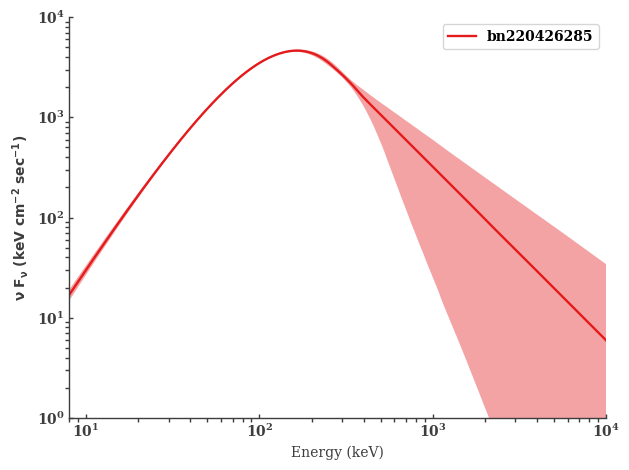

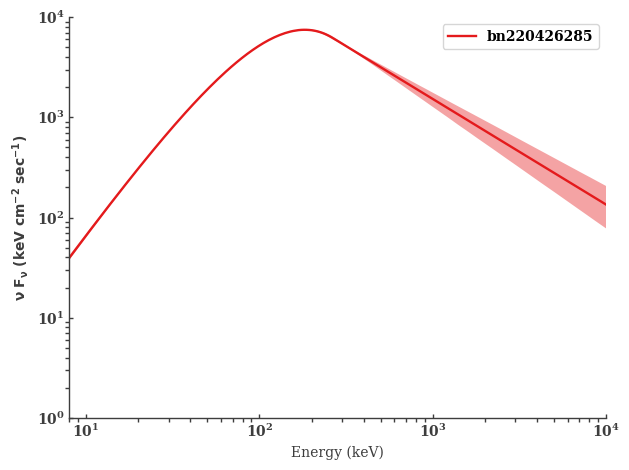

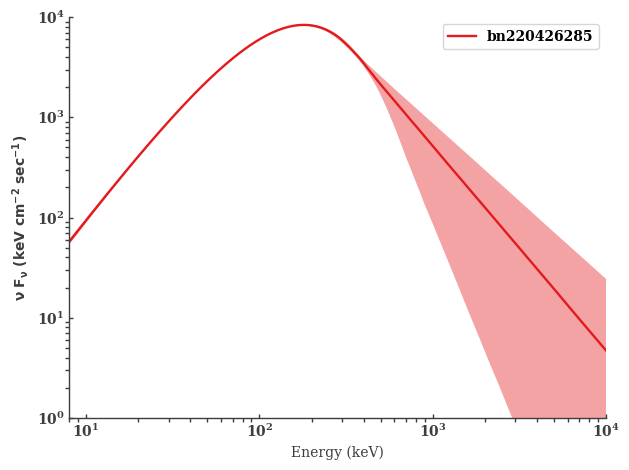

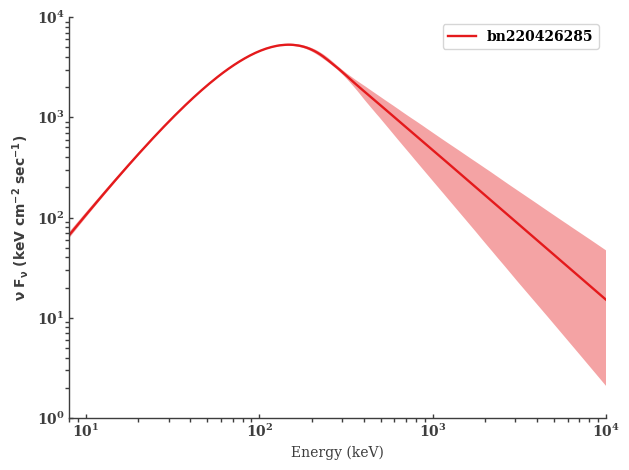

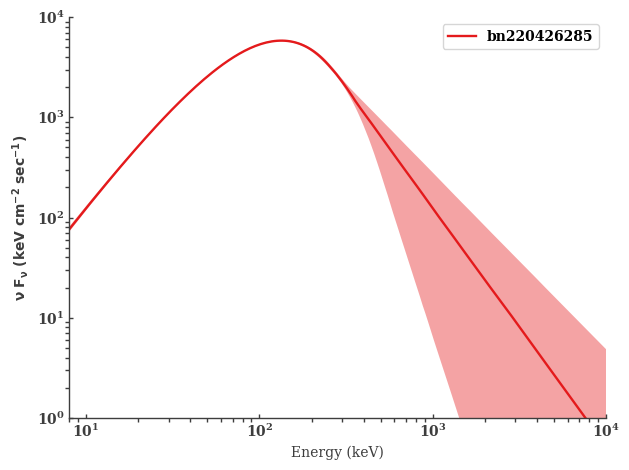

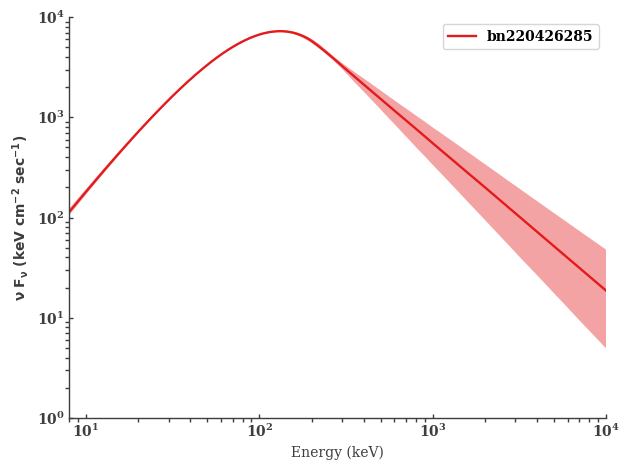

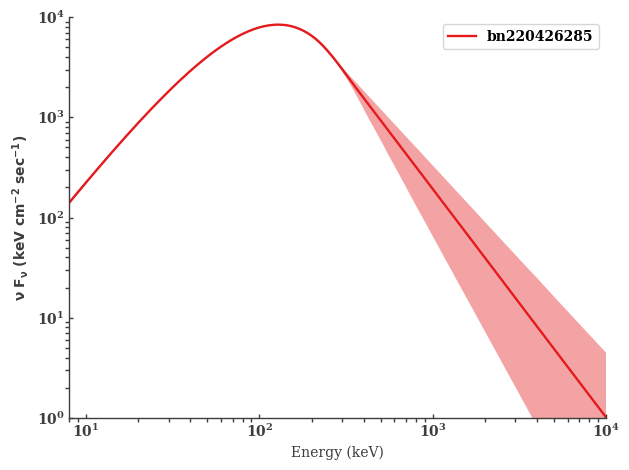

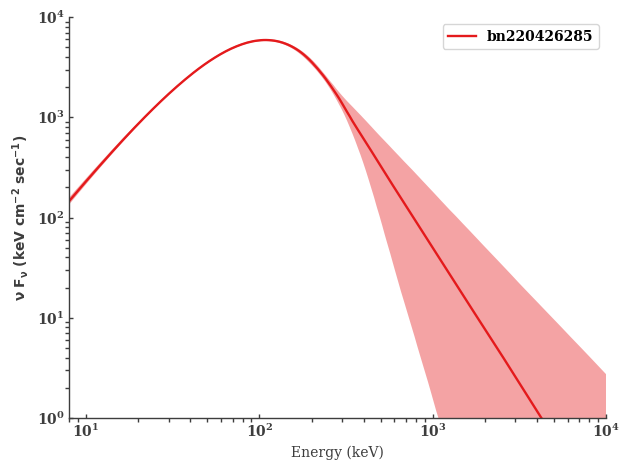

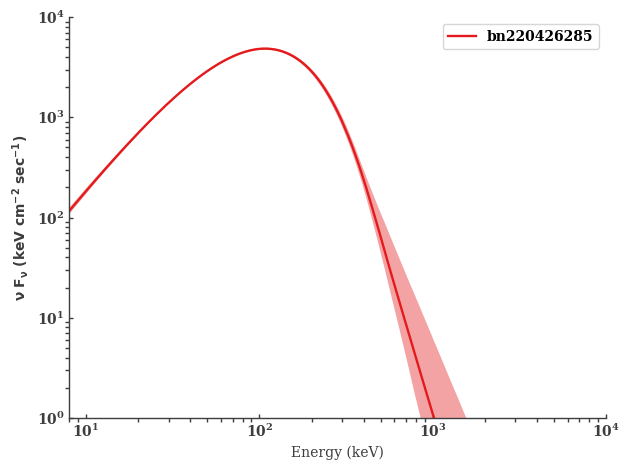

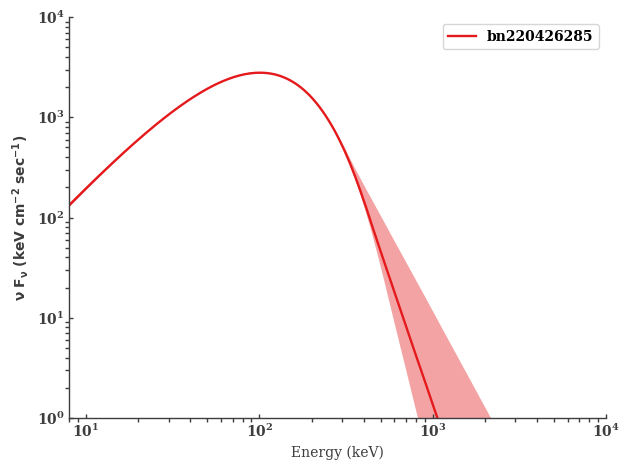

In [6]:
p = '/home/soumya/work.dir/GRB/width_studies/Fermi_GRB/{0}/spec/{0}'.format(triggerName)
aa = '/home/soumya/work.dir/GRB/width_studies/Fermi_GRB/{0}/output/{0}_{1}'.format(triggerName,model)

file1 = open('{0}_Flux.dat'.format(aa),'a')

with PdfPages('{0}_cornerplots.pdf'.format(aa)) as pdf1,PdfPages('{0}_model.pdf'.format(aa)) as pdf2,PdfPages('{0}_spectrum.pdf'.format(aa)) as pdf3:
    for j in range(1,time_stamps+1):

        model_no_eac = clone_model(spec_model)
        det_name = ['NaI1','NaI2']
        det = ['n1','n2']
        rate = [0.3, 0.3]
        p = '/home/soumya/work.dir/GRB/width_studies/Fermi_GRB/{0}/spec/{0}'.format(triggerName)
        peak  = str(j)
        nai_1 = OGIPLike(det_name[0],("{0}_{1}_srcspectra.pha".format(p,det[0])+"{"+peak+"}"),
                         ("{0}_{1}_bkgspectra.bak".format(p,det[0])+"{"+peak+"}"),
                        ("{0}_{1}_weightedrsp.rsp".format(p,det[0])+"{"+peak+"}"),spectrum_number=1,)

        nai_a = OGIPLike(det_name[1],("{0}_{1}_srcspectra.pha".format(p,det[1])+"{"+peak+"}"),
                         ("{0}_{1}_bkgspectra.bak".format(p,det[1])+"{"+peak+"}"),
                        ("{0}_{1}_weightedrsp.rsp".format(p,det[1])+"{"+peak+"}"),spectrum_number=1,)

        nai_1.set_active_measurements("8-30","40-900")
        nai_a.set_active_measurements("8-30","40-900")
        #bgo_1.set_active_measurements("250-40000")


        data_list = DataList(nai_1,nai_a)
        jl_no_eac = BayesianAnalysis(model_no_eac, data_list)
        jl_no_eac.set_sampler("dynesty_nested", share_spectrum=True)
        jl_no_eac.sampler.setup(n_live_points=1000)
        jl_no_eac.sample()
        jl_no_eac.results.corner_plot()
        pdf1.savefig()
        plt.close()

        #-----------------------------------------------------------

        fig = display_spectrum_model_counts(jl_no_eac, step=False, min_rate=rate, data_colors=["r", "b"]
        ,model_colors=["r", "b"],model_labels=[det_name[0],det_name[1]],show_background=False,source_only=True)
        ax = fig.get_axes()[0]
        ax.set_ylim(1e-5,5e2)


        jl_no_eac.results.write_to("{0}_peak_{1}.fits".format(aa,peak), overwrite=True)
        pdf3.savefig()
        plt.close()
        
        fig2 = plot_spectra(jl_no_eac.results,ene_min=8, ene_max=1e4, num_ene=200,use_components= True,
                            flux_unit='keV2/(cm2 s keV)',equal_tailed=True,fit_cmap="Set1",contour_cmap="Set1")
        ax1 = fig2.get_axes()[0]
        plt.xlabel('Energy (keV)',fontsize=10)
        plt.ylabel(r'$\rm \nu$ $\rm F_{\rm \nu}$ $\rm (keV$ $\rm cm^{-2}$ $\rm sec^{-1})$',fontsize=10)
        ax1.set_ylim(1,1e4)
        ax1.legend(numpoints=1,prop={'size':10},loc='best',labelspacing=0.7)
        plt.tick_params(direction="in")
        plt.tick_params(axis='both',which='minor',length=3,width=1,labelsize=10)
        plt.tick_params(axis='both',which='major',length=3,width=1,labelsize=10)
        plt.tight_layout()
        pdf2.savefig()
        #------------------------------------------------------------
        flx1 = jl_no_eac.results.get_flux(0.939319932 * u.keV, 9393.19932369 * u.keV)
        flx2 = jl_no_eac.results.get_flux(8 * u.keV, 40000 * u.keV)

        print('{0} {1} {2} {3} {4} {5} {6}'.format(j,str(flx1['flux']['bn220426285: total'])[:-14],
                                                   str(flx1['low bound']['bn220426285: total'])[:-14],
                                                   str(flx1['hi bound']['bn220426285: total'])[:-14],
                                                   str(flx2['flux']['bn220426285: total'])[:-14],
                                                   str(flx2['low bound']['bn220426285: total'])[:-14],
                                                   str(flx2['hi bound']['bn220426285: total'])[:-14]),file=file1)

        #--------------------------------------------------------------------------------------------
        
file1.close()

# TABLE CREATIONS

In [10]:
from astropy.table import Table
tp = Table.read('/home/soumya/work.dir/GRB/width_studies/GRB-Width-Project-Model/GRB220426A/width_evol.dat',
                format='ascii')
tm = tp['col1']
tm_nerr = tp['col1']-tp['col3']
tm_perr = tp['col4']-tp['col1']

t = Table.read('{0}_Flux_v11.dat'.format(aa),format='ascii')
f = open('{0}_param.txt'.format(aa),'w')

print('alpha alpha_nerr alpha_perr width width_nerr width_perr ep ep_nerr ep_perr AIC BIC DIC logZ PDIC flx_z flz_z_lw flx_z_hi flx flz_lw flx_hi',file=f)

for i in range(1,time_stamps+1):
    hdul = fits.open("{0}_peak_{1}.fits".format(aa,i))
    t2 = Table.read("{0}_peak_{1}.fits".format(aa,i),format='fits',hdu=1)

    print('{0} {1} {2} {3} {4} {5} {6} {7} {8} {9} {10} {11} {12} {13} {14} {15} {16} {17} {18} {19}'.format(
        t2['VALUE'][1],t2['NEGATIVE_ERROR'][1],t2['POSITIVE_ERROR'][1],
        t2['VALUE'][3],t2['NEGATIVE_ERROR'][3],t2['POSITIVE_ERROR'][3],
        t2['VALUE'][2],t2['NEGATIVE_ERROR'][2],t2['POSITIVE_ERROR'][2],
        hdul[1].header['MV0'],hdul[1].header['MV1'],hdul[1].header['MV2'],
        hdul[1].header['MV3'],hdul[1].header['MV4'],
        t['col2'][i-1],t['col3'][i-1],t['col4'][i-1],
        t['col5'][i-1],t['col6'][i-1],t['col7'][i-1]),file=f)
f.close()

In [24]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
from matplotlib.backends.backend_pdf import PdfPages 
np.seterr(all="ignore")
from astropy.io import fits
np.random.seed(12345)
import matplotlib
font = {'size' : 10}
matplotlib.rc('font',**font)
matplotlib.rc('grid',linewidth=1)
matplotlib.rc('xtick.major',width=2)
matplotlib.rc('xtick.major',size=7)
matplotlib.rc('xtick.minor',width=2)
matplotlib.rc('xtick.minor',size=4)
matplotlib.rc('ytick.major',width=2)
matplotlib.rc('ytick.major',size=7)
matplotlib.rc('ytick.minor',width=2)
matplotlib.rc('ytick.minor',size=4)
from numpy import mean
from numpy import std
from numpy import cov
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import ttest_ind
import matplotlib.ticker
from matplotlib.ticker import FormatStrFormatter

In [25]:
det = 'n2' #brightest detector for lc
p1 = '/home/soumya/work.dir/GRB/width_studies/Fermi_GRB/{0}/current/glg_tte_{1}_{0}_v00.fit'.format(triggerName,det)

In [26]:
t1 = Table.read('{0}_param.txt'.format(aa),format='ascii')

a = t1['alpha']
a_err = [-1.0*t1['alpha_nerr'],t1['alpha_perr']]
wd = t1['width']
wd_err = [-1.0*t1['width_nerr'],t1['width_perr']]
e = t1['ep']
e_nerr = [-1.0*t1['ep_nerr'],t1['ep_perr']]

mean_wd = np.mean(wd)

In [27]:
############ INITIALIZATIONS
trig = 672648596.000
t90 = 6.0

binsize = 0.1
tmin = -50.0
tmax = t90+50.0

t_b = np.arange(tmin,tmax+0.01,binsize)
zero_pos = np.absolute(t_b-0).argmin()

counts = 0 
prebkg = zero_pos-int(20/binsize)
postbkg = len(t_b)-int(50/binsize)
bkgtime =  t_b[prebkg]-t_b[0]+t_b[len(t_b)-1]-t_b[postbkg]
tplot = (t_b[1:]+t_b[:-1])/2.0 

############################# FERMI

t_data = Table.read(p1,format='fits',hdu=2)
t_data['TIME'] = t_data['TIME']-trig
t = t_data[(t_data['PHA']>=3) & (t_data['PHA']<=124) & (t_data['TIME']>tmin) & (t_data['TIME']<tmax)]

a= np.histogram(t['TIME'],bins=t_b)
abkg_cnt = binsize*(np.sum(a[0][0:prebkg])+np.sum(a[0][postbkg:len(a[0])]))/bkgtime
counts = a[0]-abkg_cnt

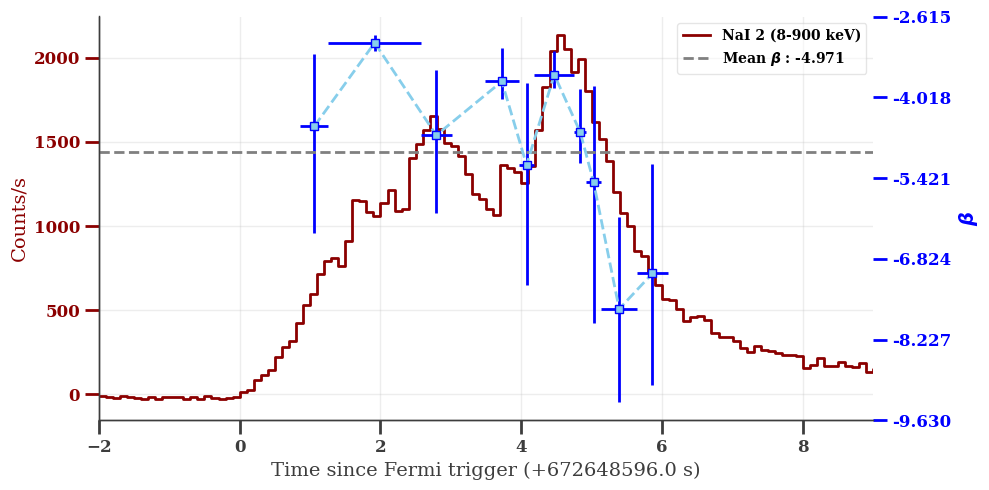

In [28]:
nticks = 6     
################################# PLOTS
fig1,ax1 = plt.subplots(figsize=(10,5))
ax1.grid(alpha=0.3)

ax1.step(tplot,counts,where='mid',label='NaI 2 (8-900 keV)',color='darkred',linewidth=2)
plt.xlim(-5,t90+5)
ax1.set_ylabel('Counts/s',fontsize=14,color='darkred')
plt.tick_params(axis='y',colors='darkred',size=10,labelsize=12)
#ax1.legend(fancybox=True, framealpha=0.5,loc=1,fontsize=10)
ax1.set_xlabel('Time since Fermi trigger (+672648596.0 s)',fontsize=14)
plt.tick_params(axis='x',size=10,labelsize=12)

ax = ax1.twinx()
ax.errorbar(tm,wd,wd_err,[tm_nerr,tm_perr],ls='--',marker='s',c='skyblue',mec='blue',ecolor='blue')
ax.set_ylabel(r'$\beta$',fontsize=14,color='blue')
plt.tick_params(axis='y',colors='blue',size=10,labelsize=12)
ax.axhline(mean_wd,ls ='--',color='grey',label=r'Mean $\beta$'+' : {0:.3f}'.format(mean_wd))

ax.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(nticks))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

plt.xlim(-2,t90+3)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax.get_legend_handles_labels()

ax.legend(lines + lines2, labels + labels2, fancybox=True, framealpha=0.5,loc=1,fontsize=10)

plt.tight_layout()
plt.savefig('{0}_pr_evolution.pdf'.format(aa),format='pdf')
plt.savefig('{0}_pr_evolution.png'.format(aa),format='png')
plt.show()

##################################################################################